In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("women review clothing.csv")
data.sample(8)

Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
1269         1269          850   47  ...         General            Tops     Blouses
14644       14644         1081   35  ...  General Petite         Dresses     Dresses
18611       18611          872   50  ...         General            Tops       Knits
8370         8370         1098   27  ...         General         Dresses     Dresses
18022       18022         1094   32  ...         General         Dresses     Dresses
15130       15130          940   59  ...         General            Tops    Sweaters
5393         5393         1094   33  ...  General Petite         Dresses     Dresses
1983         1983          862   61  ...         General            Tops       Knits

[8 rows x 11 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column: Unnamed: 0	 percent of NaN value: 0.00%
column: Clothing ID	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 0.00%
column:      Title	 percent of NaN value: 16.22%
column: Review Text	 percent of NaN value: 3.60%
column:     Rating	 percent of NaN value: 0.00%
column: Recommended IND	 percent of NaN value: 0.00%
column: Positive Feedback Count	 percent of NaN value: 0.00%
column: Division Name	 percent of NaN value: 0.06%
column: Department Name	 percent of NaN value: 0.06%
column: Class Name	 percent of NaN value: 0.06%


In [5]:
data.drop(['Clothing ID', 'Title', 'Unnamed: 0'], axis = 1, inplace = True)

menghilangkan fitur-fitur ini karena mereka kurang penting untuk analisis sentimen tinjauan.

In [6]:
data.describe().T

count       mean        std  ...   50%   75%    max
Age                      23486.0  43.198544  12.279544  ...  41.0  52.0   99.0
Rating                   23486.0   4.196032   1.110031  ...   5.0   5.0    5.0
Recommended IND          23486.0   0.822362   0.382216  ...   1.0   1.0    1.0
Positive Feedback Count  23486.0   2.535936   5.702202  ...   1.0   3.0  122.0

[4 rows x 8 columns]

terlihat rata-rata rating produk 4 dengan skala 1-5 berarti respon cutomer produk dapat dikatakan baik, rata-rata umur 43th (sudah berumur/ dewasa tua),
produk mayoritas direkomendasikan kepada reviewer, dan sedikit positif feedback kepada customer

In [7]:
data.describe(include='object').T

count  ...   freq
Review Text      22641  ...      3
Division Name    23472  ...  13850
Department Name  23472  ...  10468
Class Name       23472  ...   6319

[4 rows x 4 columns]

nama divisi produk yang memiliki review mayoritas adalah general dvision, dengan department name : tops, dan class name mayoritas adalah dresses

In [8]:
print(data.duplicated().sum())#cek duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

234
0


In [9]:
#CLEANING DATA
data.dropna(subset=['Review Text'], inplace=True)
data.dropna(subset=['Division Name'], inplace=True)
data.dropna(subset=['Department Name'], inplace=True)
data.dropna(subset=['Class Name'], inplace=True)

In [10]:
data.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [11]:
#cek isi review
data['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [12]:
review = data[['Review Text', 'Recommended IND','Rating']]
review.head()#create new dataframe

Review Text  Recommended IND  Rating
0  Absolutely wonderful - silky and sexy and comf...                1       4
1  Love this dress!  it's sooo pretty.  i happene...                1       5
2  I had such high hopes for this dress and reall...                0       3
3  I love, love, love this jumpsuit. it's fun, fl...                1       5
4  This shirt is very flattering to all due to th...                1       5

In [13]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

Review  Recommended  Rating
0  Absolutely wonderful - silky and sexy and comf...            1       4
1  Love this dress!  it's sooo pretty.  i happene...            1       5
2  I had such high hopes for this dress and reall...            0       3
3  I love, love, love this jumpsuit. it's fun, fl...            1       5
4  This shirt is very flattering to all due to th...            1       5

In [14]:
review['Review'] = review['Review'].astype(str)
review['Recommended'].value_counts()#data imbalance

1    18524
0     4101
Name: Recommended, dtype: int64

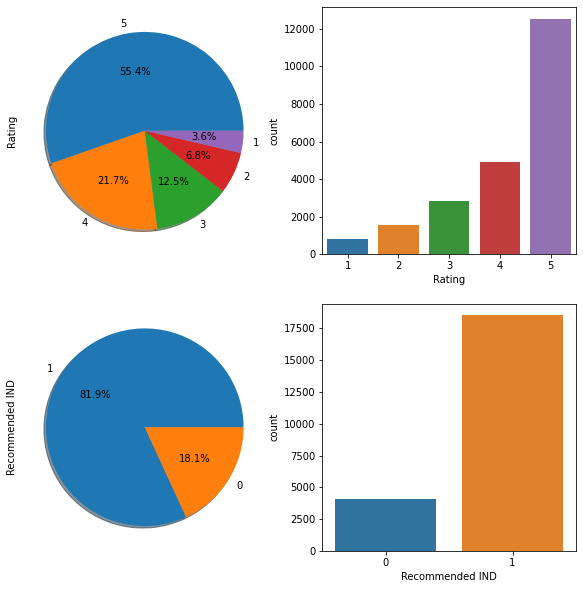

In [15]:
#EDA VISUALIZATION
num_col = ['Rating','Recommended IND']
plt.figure(figsize=(10, 10))
count = 1
for cols in num_col:
    plt.subplot(2, 2, count)
    data[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(2, 2, count)
    sns.countplot(cols, data=data)
    count+=1

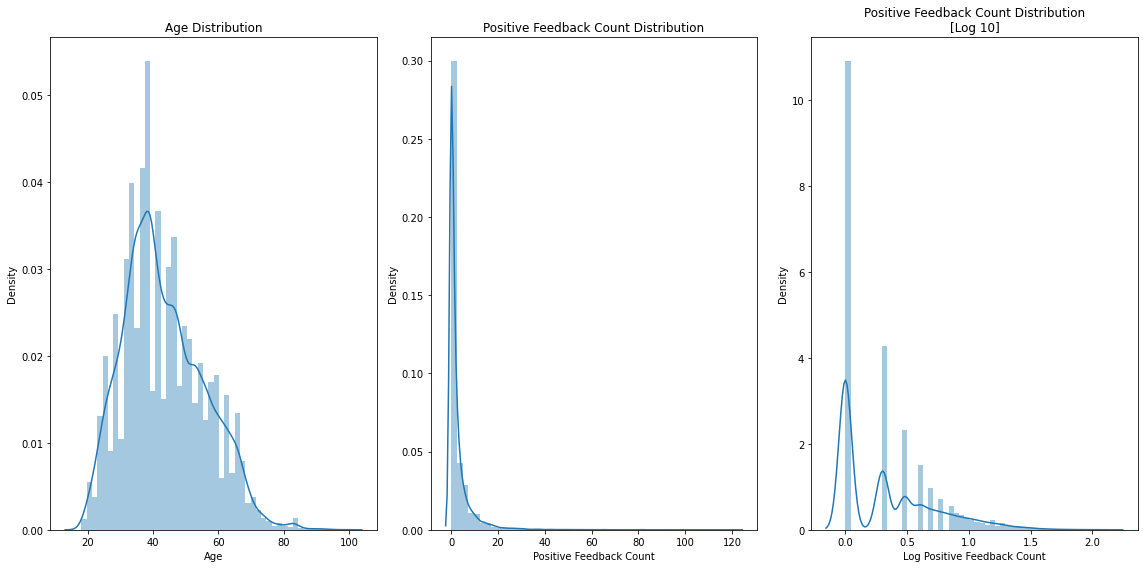

In [16]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(16,8), sharey=False)
sns.distplot(data.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(data["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((data["Positive Feedback Count"][data["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px
px.histogram(data, x = data['Rating'], color = data["Recommended IND"])

rating 1,2,3 cenderung tidak direkomendasikan produk

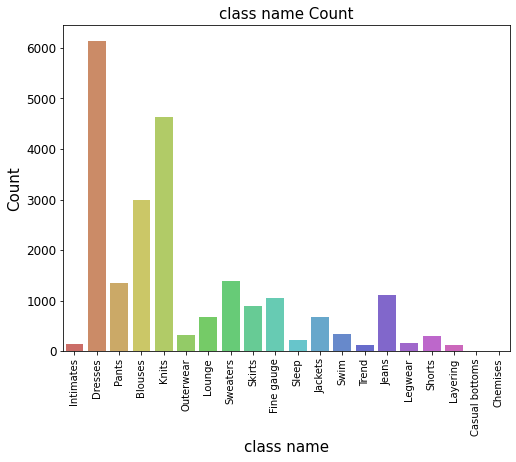

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class Name', data=data, palette="hls")
plt.xlabel("class name", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("class name Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()

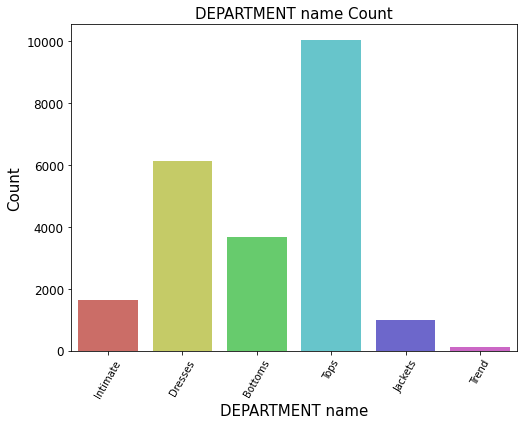

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department Name', data=data, palette="hls")
plt.xlabel("DEPARTMENT name", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("DEPARTMENT name Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=60)
plt.show()

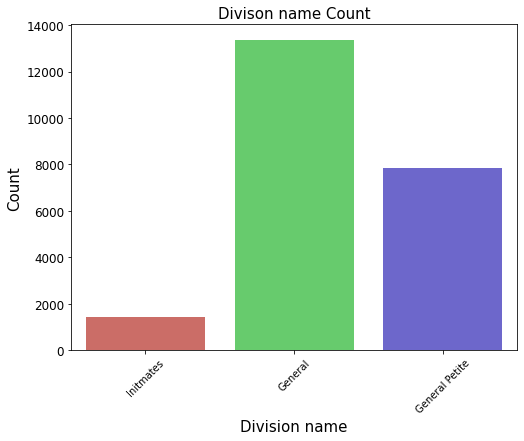

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Division Name', data=data, palette="hls")
plt.xlabel("Division name", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("Divison name Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

penjualan terbanyak ada pada produk dresses, diikuti oleh knits, lalu blouses

In [21]:
px.scatter(data, x="Age", y="Positive Feedback Count",
           facet_row="Recommended IND", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})

In [22]:
px.box(data, x="Age", y="Division Name", orientation="h",color = 'Recommended IND')

In [23]:
data['review_len'] = data['Review Text'].astype(str).apply(len)
px.histogram(data, x = 'review_len' ,color = "Recommended IND")

In [24]:
review["Review"].tolist()

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [25]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [26]:
#cleaning text
def decontracted(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [27]:
review["Review"] = review["Review"].apply(lambda x: decontracted(x))

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
punctuation = '!"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'
numbers = "0123456789"

def clean_text(text):
    clean_list = [x for x in text if x not in punctuation]
    clean_list = [x for x in clean_list if x not in numbers]
    clean_list = [x.lower() for x in clean_list]
    cleaned_text = ''.join(clean_list)
    return cleaned_text

In [30]:
review["Review"] = review["Review"].apply(clean_text)
review["Review"].tolist()

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress  it is sooo pretty.  i happened to find it in a store, and im glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am .  i love the length on me hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small my usual size but i found this to be outrageously small. so small in fact that i could not zip it up i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap net over layers. imo, a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love, love, love this jumpsuit. it is fun, flirty, and fabulous every time i wear it, i get nothing but great compliments',
 'this shirt 

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [32]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [33]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)
review['Review_clear'] = review['Review'].apply(stopwords)
review.head()


Review  ...                                       Review_clear
0  absolutely wonderful  silky and sexy and comfo...  ...        absolutely wonderful silky sexy comfortable
1  love this dress  it is sooo pretty.  i happene...  ...  love sooo pretty. happened find store, im glad...
2  i had such high hopes for this dress and reall...  ...  high hopes really wanted work me. initially or...
3  i love, love, love this jumpsuit. it is fun, f...  ...  love, love, love jumpsuit. fun, flirty, fabulo...
4  this shirt is very flattering to all due to th...  ...  flattering due adjustable front tie. perfect l...

[5 rows x 4 columns]

In [34]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
review['Review_clear'] = review['Review_clear'].apply(lemma)
review.head()

Review  ...                                       Review_clear
0  absolutely wonderful  silky and sexy and comfo...  ...        absolutely wonderful silky sexy comfortable
1  love this dress  it is sooo pretty.  i happene...  ...  love sooo pretty. happened find store, im glad...
2  i had such high hopes for this dress and reall...  ...  high hope really wanted work me. initially ord...
3  i love, love, love this jumpsuit. it is fun, f...  ...  love, love, love jumpsuit. fun, flirty, fabulo...
4  this shirt is very flattering to all due to th...  ...  flattering due adjustable front tie. perfect l...

[5 rows x 4 columns]

In [36]:
from textblob import TextBlob
from textblob import *
review['polarity'] = review['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
review['polarity']

0        0.633333
1        0.318750
2        0.076392
3        0.500000
4        0.393750
           ...   
23481    0.512667
23482    0.091667
23483    0.414286
23484    0.150000
23485    0.364444
Name: polarity, Length: 22625, dtype: float64

In [37]:
px.histogram(review, x = 'polarity',color="Rating", opacity = 0.5)

In [101]:
positive = review[review.Recommended== 1]
negative = review[review.Recommended== 0]
positive.head()

Review  ...  Review Type
0  absolutely wonderful  silky and sexy and comfo...  ...            2
1  love this dress  it is sooo pretty.  i happene...  ...            2
3  i love, love, love this jumpsuit. it is fun, f...  ...            2
4  this shirt is very flattering to all due to th...  ...            2
6  i aded this in my basket at hte last mintue to...  ...            2

[5 rows x 6 columns]

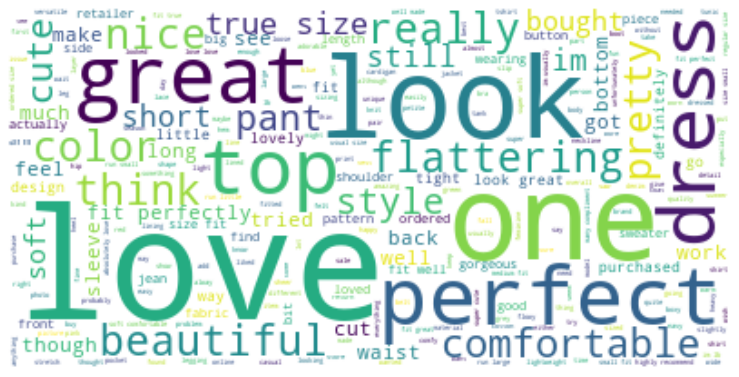

In [102]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)

wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

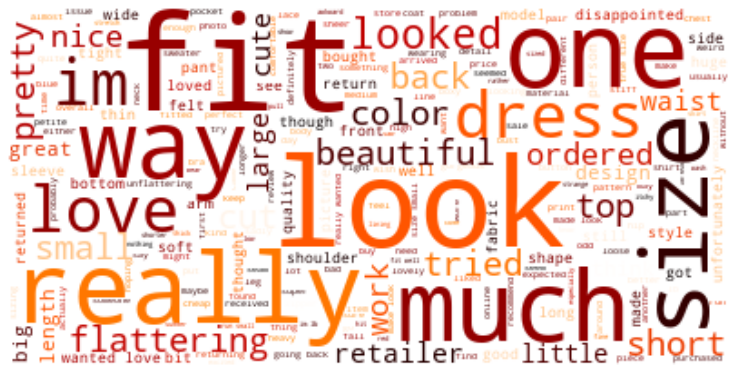

In [103]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)

wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [111]:
X1 = positive['Review_clear']
y1 = positive['Recommended']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state = 75)

In [107]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train1)

X_train_vectorized = vect.transform(X_train1)

len(vect.get_feature_names())

14898

In [108]:


model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train1, y_train1)

ytest = np.array(y_test1)
pred_y = model_nb.predict(X_test1)

print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))



accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3705

    accuracy                           1.00      3705
   macro avg       1.00      1.00      1.00      3705
weighted avg       1.00      1.00      1.00      3705



In [109]:


model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train1, y_train1)

ytest = np.array(y_test1)
pred = model_rf.predict(X_test1)

print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

#SETELAH INI KITA MELAKUKAN PREDIKSI BERDASARKAN RATING

accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3705

    accuracy                           1.00      3705
   macro avg       1.00      1.00      1.00      3705
weighted avg       1.00      1.00      1.00      3705



Meskipun kita bisa mendapatkan penilaian kasar tentang polaritas ulasan berdasarkan fungsi polaritas sentimen TextBlob, mari buat pengklasifikasi berdasarkan istilah kita sendiri. Untuk tujuan ini, saya akan mengklasifikasikan ulasan dengan 4 dan 5 bintang sebagai ulasan positif, 3 sebagai netral, dan di bawah 3 sebagai negatif. Mari kita refleksikan ini di kolom fitur baru.

In [38]:
positive = (review["Rating"] >= 4)
neutral = (review["Rating"] == 3)
negative = (review["Rating"] < 3)

review["Review Type"] = " "
review["Review Type"][positive] = "Positive"
review["Review Type"][neutral] = "Neutral"
review["Review Type"][negative] = "Negative"

review.head()

Review  ...  Review Type
0  absolutely wonderful  silky and sexy and comfo...  ...     Positive
1  love this dress  it is sooo pretty.  i happene...  ...     Positive
2  i had such high hopes for this dress and reall...  ...      Neutral
3  i love, love, love this jumpsuit. it is fun, f...  ...     Positive
4  this shirt is very flattering to all due to th...  ...     Positive

[5 rows x 6 columns]

In [39]:
review_type = {"Positive": 2, "Neutral": 1, "Negative": 0}
review["Review Type"] = review["Review Type"].map(review_type)
review.head()

Review  ...  Review Type
0  absolutely wonderful  silky and sexy and comfo...  ...            2
1  love this dress  it is sooo pretty.  i happene...  ...            2
2  i had such high hopes for this dress and reall...  ...            1
3  i love, love, love this jumpsuit. it is fun, f...  ...            2
4  this shirt is very flattering to all due to th...  ...            2

[5 rows x 6 columns]

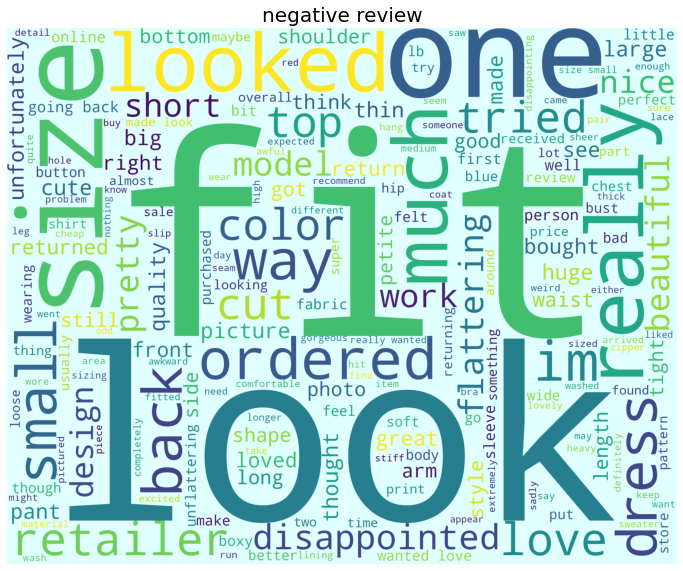

In [48]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
data_r1 = review[review['Review Type']==0]['Review_clear']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r1))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('negative review',size=20)
plt.axis('off')
plt.show()

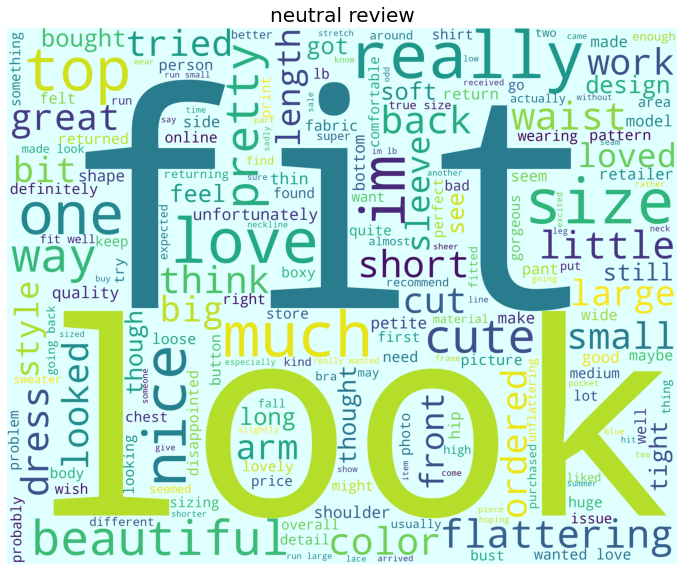

In [49]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
data_r2 = review[review['Review Type']==1]['Review_clear']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r2))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('neutral review',size=20)
plt.axis('off')
plt.show()

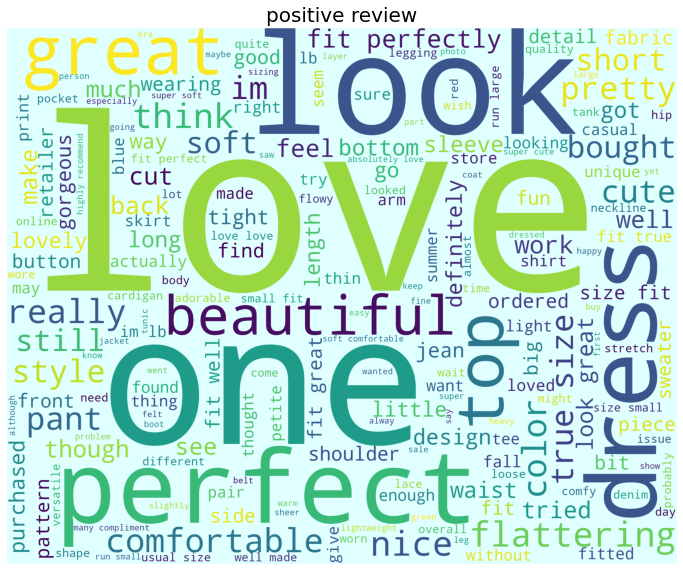

In [50]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
data_r3 = review[review['Review Type']==2]['Review_clear']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r3))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('positive review',size=20)
plt.axis('off')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = review['Review_clear']
y = review['Review Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 75)

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

18092

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.7829834254143646
              precision    recall  f1-score   support

           0       0.87      0.06      0.11       451
           1       0.40      0.01      0.02       561
           2       0.78      1.00      0.88      3513

    accuracy                           0.78      4525
   macro avg       0.68      0.36      0.34      4525
weighted avg       0.74      0.78      0.70      4525



In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.7938121546961326
              precision    recall  f1-score   support

           0       0.57      0.18      0.27       451
           1       0.35      0.02      0.04       561
           2       0.80      1.00      0.89      3513

    accuracy                           0.79      4525
   macro avg       0.57      0.40      0.40      4525
weighted avg       0.73      0.79      0.72      4525



In [54]:
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.8039779005524862
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       451
           1       0.39      0.12      0.19       561
           2       0.85      0.97      0.91      3513

    accuracy                           0.80      4525
   macro avg       0.57      0.49      0.51      4525
weighted avg       0.76      0.80      0.77      4525



In [85]:
from sklearn.naive_bayes import BernoulliNB
bern = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('classifier', BernoulliNB()),
                ])

bern.fit(X_train, y_train)
ytest = np.array(y_test)
bern_pred = bern.predict(X_test)

print('accuracy %s' % accuracy_score(bern_pred, y_test))
print(classification_report(ytest, bern_pred))

accuracy 0.7969060773480663
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       451
           1       0.37      0.41      0.39       561
           2       0.90      0.90      0.90      3513

    accuracy                           0.80      4525
   macro avg       0.60      0.59      0.59      4525
weighted avg       0.80      0.80      0.80      4525



In [87]:
nb_acc = accuracy_score(pred_y, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)
bern_acc = accuracy_score(bern_pred, y_test)
models = pd.DataFrame({
                      'Model': ['Naive Bayes', 'Random Forest', 'AdaBoosting','BernoulliNaiv'],
                      'Score': [nb_acc,rf_acc, ada_acc, bern_acc]})
models.sort_values(by='Score', ascending=False)

Model     Score
2    AdaBoosting  0.803978
3  BernoulliNaiv  0.796906
1  Random Forest  0.793812
0    Naive Bayes  0.782983